In [1]:
from greedy_mcmc_attack import *
from data_collection.recordings import *
import sys
sys.path.append("../../")
from src.models.gcn import *
from src.models.gat import *
from src.models.gsage import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Cora')
data = cora_dataset[0].to(device)
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [4]:
edges_to_add = None

In [5]:
model = GraphSAGE(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [6]:
model_save_path = "../models/cora_gsage_model.pth"
list_save_path = "../attacks/cora_gsage_edges.pth"
# # multi_metattack_edges_list.pth
# list_save_path = "multi_metattack_edges_list.pth"

In [7]:
model, edges_to_add, train = load_model_and_edges(model_save_path, list_save_path, model, device)

In [8]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.804
Initial Loss: 0.7111045122146606


In [9]:
G, initial_edge_count, ptb_rate, budget = initialize(data, _ptb_rate=0.15)

In [10]:
full_metattack_acc, full_metattack_loss, full_metattack_itrs = two_phase_attack_mcmc(data, train, model, 0.0, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

In [11]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [12]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: -5.1081180572509766e-05
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.3245811462402344e-06, master_dirty_delta: -4.112720489501953e-06
Attempt: 5, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -0.002178370952606201, master_dirty_delta: -0.0015785694122314453
Attempt: 6, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -9.000301361083984e-06, master_dirty_delta: -8.881092071533203e-06
Attempt: 7, Selected: 0
Attempt: 8, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -0.0002072453498840332
Attempt: 9, Selected: 0
Attempt: 10, Selected: 0
Attempt: 11, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 9.119510650634766e-06, master_dirty_delta: -3.3020973

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 16, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0004955530166625977, master_dirty_delta: 0.00046503543853759766
Attempt: 30, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: 0.00019890069961547852, master_dirty_delta: 0.0005604028701782227
Attempt: 31, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -3.719329833984375e-05, master_dirty_delta: 0.0008220672607421875
Attempt: 47, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.0030388236045837402, master_dirty_delta: 0.003933548927307129
Attempt: 61, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0034348368644714355, master_dirty_delta: 0.004067420959472656
Attempt: 76, Selected: 50
max_change: 0.007111045122146606, master_clean_delta: 0.0039286017417907715, master_dirty_delta: 0.004547

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 20, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0002783536911010742, master_dirty_delta: 0.0006292462348937988
Attempt: 35, Selected: 20
Attempt: 36, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -0.0005047321319580078, master_dirty_delta: 0.0005249381065368652
Attempt: 50, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.002994358539581299, master_dirty_delta: 0.0039009451866149902
Attempt: 62, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0034072399139404297, master_dirty_delta: 0.00421452522277832
Attempt: 79, Selected: 50
max_change: 0.007111045122146606, master_clean_delta: 0.004014313220977783, master_dirty_delta: 0.0051479339599609375
Attempt: 97, Selected: 60
max_change: 0.007111045122146606, master_clean_delta: 0.002117633819580078, master_

In [13]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GSAGE, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"cora"}_{"constant"}_{"binary"}_{"reversed"}_results.pkl')

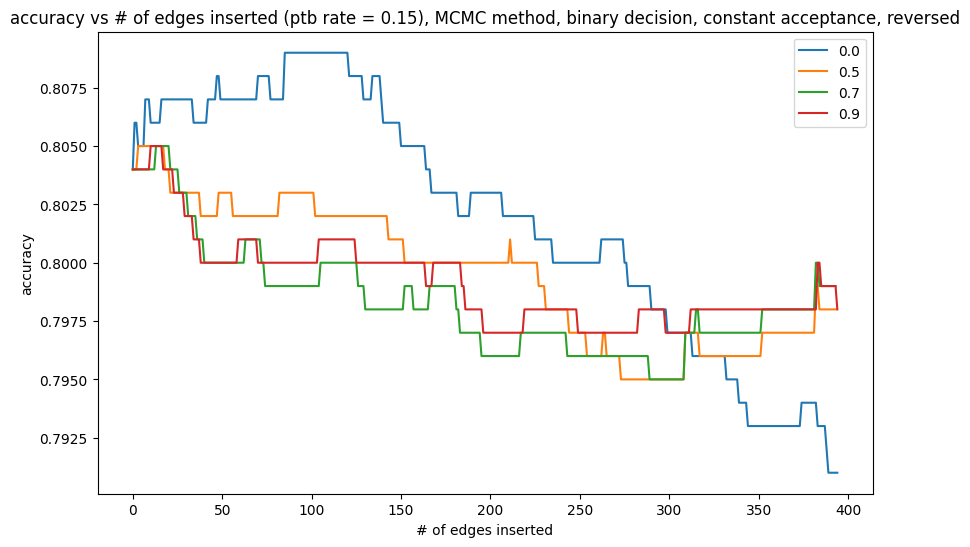

In [14]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "reversed")

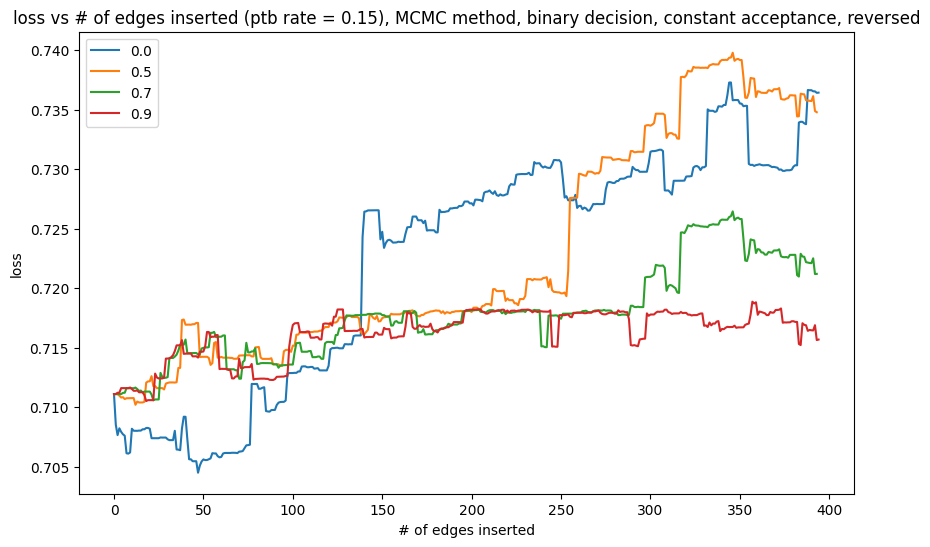

In [15]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "reversed")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [16]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [17]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: -5.1081180572509766e-05
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.3245811462402344e-06, master_dirty_delta: -4.112720489501953e-06
Attempt: 5, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -0.002178370952606201, master_dirty_delta: -0.0015785694122314453
Attempt: 6, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -9.000301361083984e-06, master_dirty_delta: -8.881092071533203e-06
Attempt: 7, Selected: 0
Attempt: 8, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -0.0002072453498840332
Attempt: 9, Selected: 0
Attempt: 10, Selected: 0
Attempt: 11, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 9.119510650634766e-06, master_dirty_delta: -3.3020973

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 17, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0001671910285949707, master_dirty_delta: 0.0003021359443664551
Attempt: 32, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -0.00044667720794677734, master_dirty_delta: 0.00015312433242797852
Attempt: 33, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -0.0006570219993591309, master_dirty_delta: -1.8715858459472656e-05
Attempt: 34, Selected: 20
Attempt: 35, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -8.171796798706055e-05, master_dirty_delta: 0.0005254745483398438
Attempt: 54, Selected: 30
Attempt: 55, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: -0.0003217458724975586, master_dirty_delta: 0.0002924799919128418
Attempt: 69, Selected: 40
max_change: 0.007111045122146606, master_clean

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 23, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: -3.147125244140625e-05, master_dirty_delta: 0.0004368424415588379
Attempt: 41, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -7.730722427368164e-05, master_dirty_delta: 0.0006800293922424316
Attempt: 59, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: -6.920099258422852e-05, master_dirty_delta: 0.0005647540092468262
Attempt: 74, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0004207491874694824, master_dirty_delta: 0.0010491013526916504
Attempt: 91, Selected: 50
max_change: 0.007111045122146606, master_clean_delta: 0.004685878753662109, master_dirty_delta: 0.005360543727874756
Attempt: 92, Selected: 50
max_change: 0.007111045122146606, master_clean_delta: 0.000652313232421875, master_dirty_delta: 0.0013270

In [18]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GSAGE, Dataset.CORA, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"cora"}_{"increasing"}_{"binary"}_{"reversed"}_results.pkl')

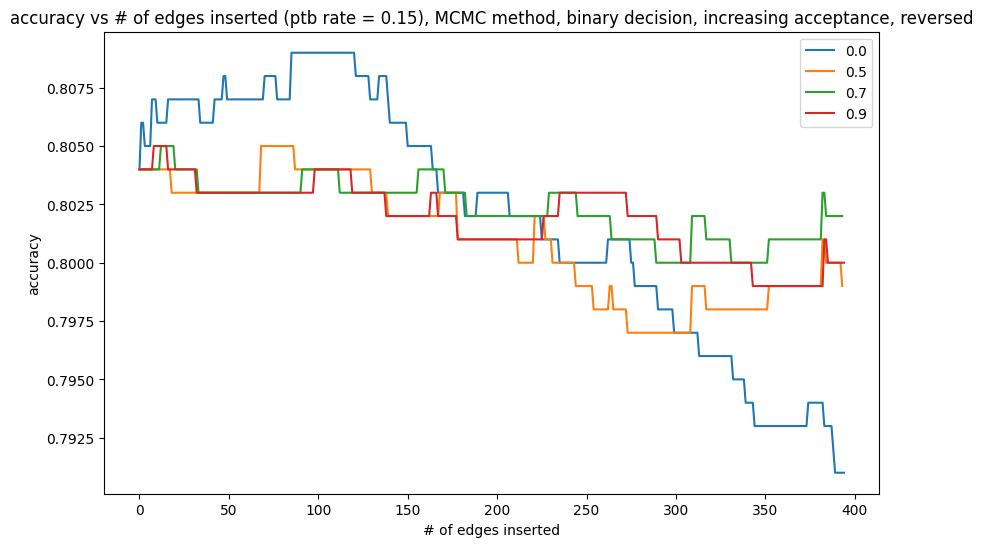

In [19]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "reversed")

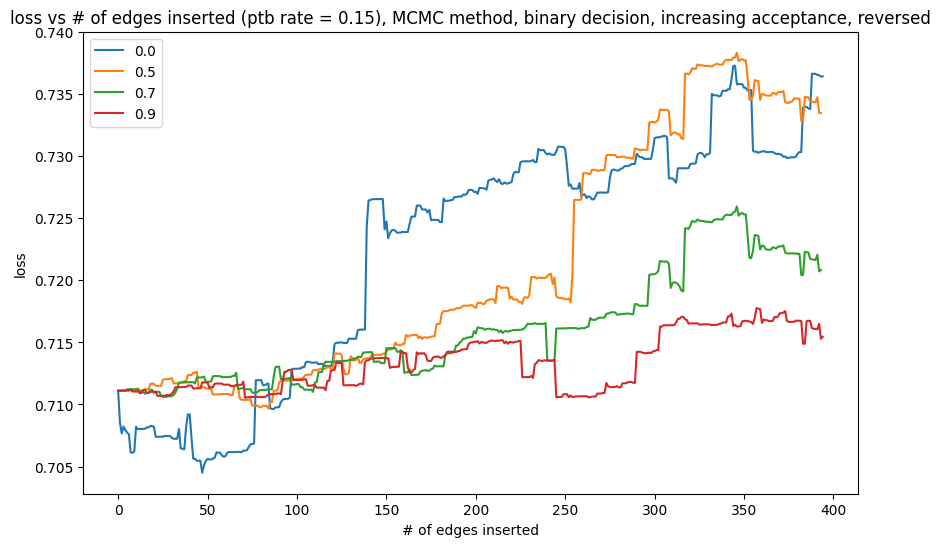

In [20]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "reversed")

In [21]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [22]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: -5.1081180572509766e-05
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.3245811462402344e-06, master_dirty_delta: -4.112720489501953e-06
Attempt: 5, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -0.002178370952606201, master_dirty_delta: -0.0015785694122314453
Attempt: 6, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -9.000301361083984e-06, master_dirty_delta: -8.881092071533203e-06
Attempt: 7, Selected: 0
Attempt: 8, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -0.0002072453498840332
Attempt: 9, Selected: 0
Attempt: 10, Selected: 0
Attempt: 11, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 9.119510650634766e-06, master_dirty_delta: -3.3020973

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 16, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0004955530166625977, master_dirty_delta: 0.00046503543853759766
Attempt: 35, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -0.00013911724090576172, master_dirty_delta: 0.000859379768371582
Attempt: 56, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.004387915134429932, master_dirty_delta: 0.005357325077056885
Attempt: 76, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.005873262882232666, master_dirty_delta: 0.006683647632598877
Attempt: 103, Selected: 50
max_change: 0.007111045122146606, master_clean_delta: 0.006167590618133545, master_dirty_delta: 0.007028162479400635
Attempt: 104, Selected: 50
max_change: 0.007111045122146606, master_clean_delta: 0.006171703338623047, master_dirty_delta: 0.0070329904

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 20, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0002783536911010742, master_dirty_delta: 0.0006292462348937988
Attempt: 21, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0004347562789916992, master_dirty_delta: 0.0009185671806335449
Attempt: 38, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: 0.0020351409912109375, master_dirty_delta: 0.0030648112297058105
Attempt: 57, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.004658043384552002, master_dirty_delta: 0.005504310131072998
Attempt: 58, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.004812419414520264, master_dirty_delta: 0.005658745765686035
Attempt: 80, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.007437705993652344, master_dirty_delta: 0.008440136909

In [23]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GSAGE, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"cora"}_{"constant"}_{"decaying"}_{"reversed"}_results.pkl')

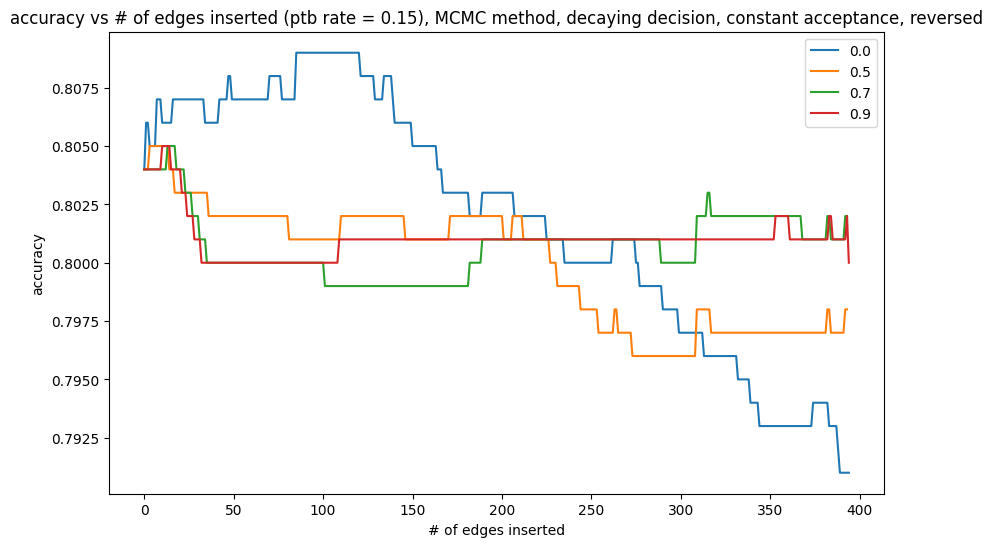

In [24]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "reversed")

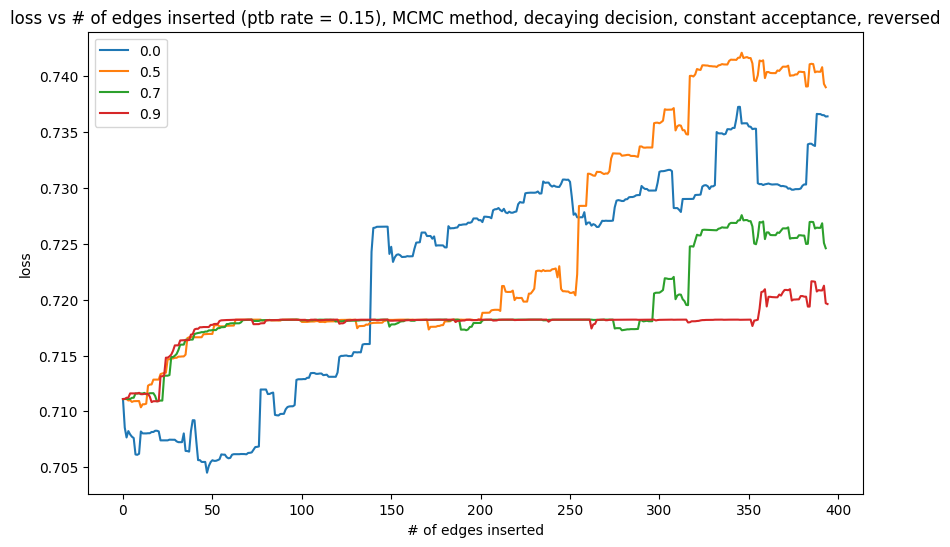

In [25]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "reversed")

In [26]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [27]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: -5.1081180572509766e-05
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.3245811462402344e-06, master_dirty_delta: -4.112720489501953e-06
Attempt: 5, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -0.002178370952606201, master_dirty_delta: -0.0015785694122314453
Attempt: 6, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -9.000301361083984e-06, master_dirty_delta: -8.881092071533203e-06
Attempt: 7, Selected: 0
Attempt: 8, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -0.0002072453498840332
Attempt: 9, Selected: 0
Attempt: 10, Selected: 0
Attempt: 11, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 9.119510650634766e-06, master_dirty_delta: -3.3020973

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 17, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0001671910285949707, master_dirty_delta: 0.0003021359443664551
Attempt: 36, Selected: 20
Attempt: 37, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -0.0002599358558654785, master_dirty_delta: 0.0004897117614746094
Attempt: 64, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.0007183551788330078, master_dirty_delta: 0.0014452934265136719
Attempt: 102, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0008741021156311035, master_dirty_delta: 0.0017226338386535645
Attempt: 103, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0008796453475952148, master_dirty_delta: 0.001728832721710205
Attempt: 104, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0008825063705444336, 

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 23, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: -3.147125244140625e-05, master_dirty_delta: 0.0004368424415588379
Attempt: 47, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: 6.848573684692383e-05, master_dirty_delta: 0.0008258223533630371
Attempt: 48, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: 0.00012320280075073242, master_dirty_delta: 0.0008805990219116211
Attempt: 70, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.0005391836166381836, master_dirty_delta: 0.0012927651405334473
Attempt: 105, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0005418658256530762, master_dirty_delta: 0.0013303160667419434
Attempt: 106, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0002192854881286621, master_dirty_delta: 0.001

In [28]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GSAGE, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"cora"}_{"increasing"}_{"decaying"}_{"reversed"}_results.pkl')

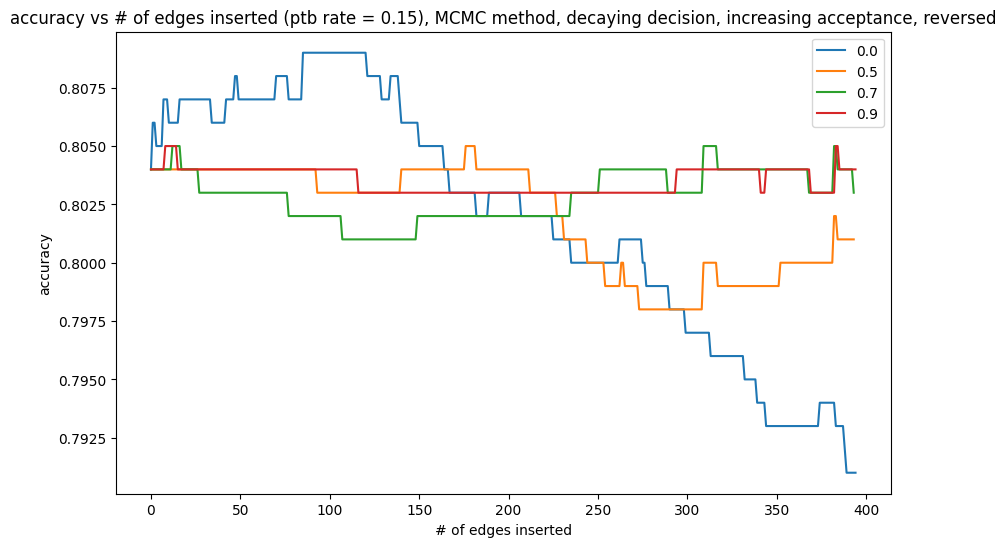

In [29]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

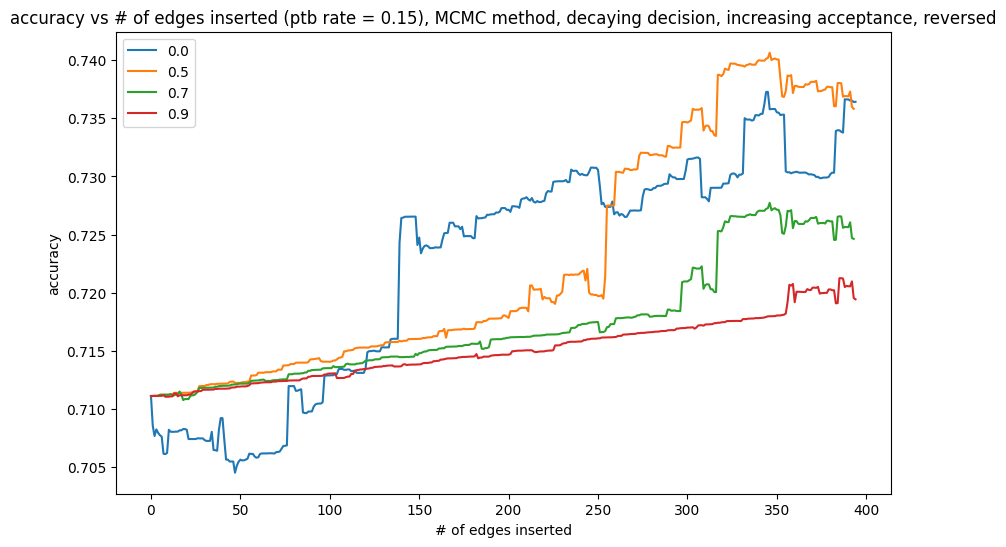

In [30]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

# regular, secondary attack, not reversed

In [31]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [32]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: -5.1081180572509766e-05
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.3245811462402344e-06, master_dirty_delta: -4.112720489501953e-06
Attempt: 5, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -0.002178370952606201, master_dirty_delta: -0.0015785694122314453
Attempt: 6, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -9.000301361083984e-06, master_dirty_delta: -8.881092071533203e-06
Attempt: 7, Selected: 0
Attempt: 8, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -0.0002072453498840332
Attempt: 9, Selected: 0
Attempt: 10, Selected: 0
Attempt: 11, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 9.119510650634766e-06, master_dirty_delta: -3.3020973

Peturbing graph...:   0%|          | 0/203 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 16, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0004955530166625977, master_dirty_delta: 0.00046503543853759766
Attempt: 30, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: 0.00019890069961547852, master_dirty_delta: 0.0005604028701782227
Attempt: 31, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -3.719329833984375e-05, master_dirty_delta: 0.0008220672607421875
Attempt: 47, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.0030388236045837402, master_dirty_delta: 0.003933548927307129
Attempt: 61, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0034348368644714355, master_dirty_delta: 0.004067420959472656
Attempt: 76, Selected: 50
max_change: 0.007111045122146606, master_clean_delta: 0.0039286017417907715, master_dirty_delta: 0.004547

Peturbing graph...:   0%|          | 0/122 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 20, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0002783536911010742, master_dirty_delta: 0.0006292462348937988
Attempt: 35, Selected: 20
Attempt: 36, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -0.0005047321319580078, master_dirty_delta: 0.0005249381065368652
Attempt: 50, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.0029942989349365234, master_dirty_delta: 0.0039009451866149902
Attempt: 62, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0034072399139404297, master_dirty_delta: 0.00421452522277832
Attempt: 79, Selected: 50
max_change: 0.007111045122146606, master_clean_delta: 0.004014313220977783, master_dirty_delta: 0.0051479339599609375
Attempt: 97, Selected: 60
max_change: 0.007111045122146606, master_clean_delta: 0.002117633819580078, master

Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

In [33]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GSAGE, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"cora"}_{"constant"}_{"binary"}_{"attacked"}_results.pkl')

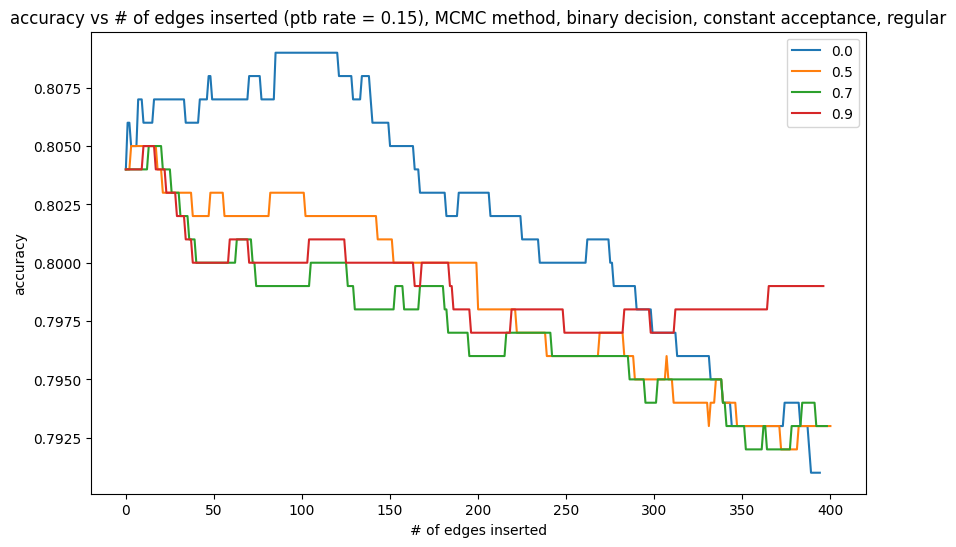

In [34]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "regular")

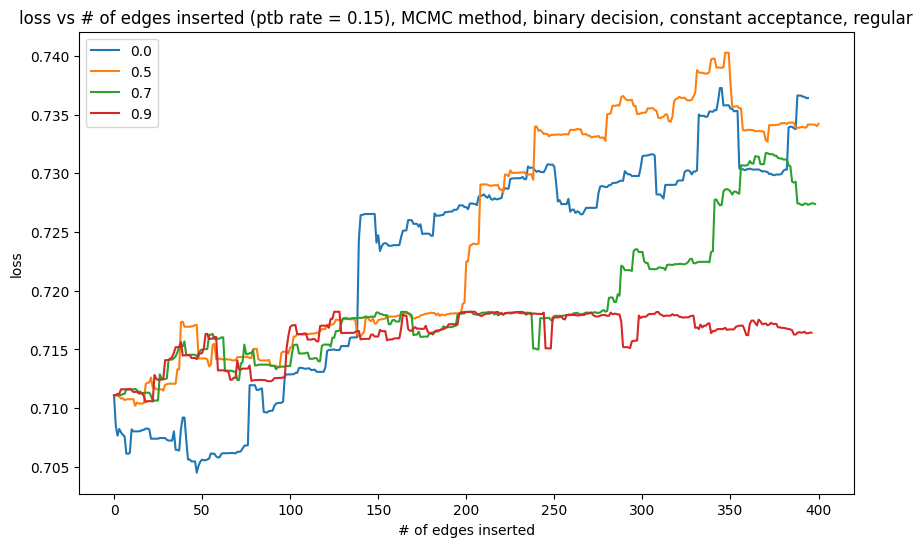

In [35]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "regular")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [36]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [37]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: -5.1081180572509766e-05
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.3245811462402344e-06, master_dirty_delta: -4.112720489501953e-06
Attempt: 5, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -0.002178370952606201, master_dirty_delta: -0.0015785694122314453
Attempt: 6, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -9.000301361083984e-06, master_dirty_delta: -8.881092071533203e-06
Attempt: 7, Selected: 0
Attempt: 8, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -0.0002072453498840332
Attempt: 9, Selected: 0
Attempt: 10, Selected: 0
Attempt: 11, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 9.119510650634766e-06, master_dirty_delta: -3.3020973

Peturbing graph...:   0%|          | 0/202 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 17, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0001671910285949707, master_dirty_delta: 0.0003021359443664551
Attempt: 32, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -0.00044667720794677734, master_dirty_delta: 0.00015312433242797852
Attempt: 33, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -0.0006570219993591309, master_dirty_delta: -1.8715858459472656e-05
Attempt: 34, Selected: 20
Attempt: 35, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -8.171796798706055e-05, master_dirty_delta: 0.0005254745483398438
Attempt: 54, Selected: 30
Attempt: 55, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: -0.0003217458724975586, master_dirty_delta: 0.0002924799919128418
Attempt: 69, Selected: 40
max_change: 0.007111045122146606, master_clean

Peturbing graph...:   0%|          | 0/122 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 23, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: -3.147125244140625e-05, master_dirty_delta: 0.0004368424415588379
Attempt: 41, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -7.730722427368164e-05, master_dirty_delta: 0.0006800293922424316
Attempt: 59, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: -6.920099258422852e-05, master_dirty_delta: 0.0005647540092468262
Attempt: 74, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0004207491874694824, master_dirty_delta: 0.0010491013526916504
Attempt: 91, Selected: 50
max_change: 0.007111045122146606, master_clean_delta: 0.004685878753662109, master_dirty_delta: 0.005360543727874756
Attempt: 92, Selected: 50
max_change: 0.007111045122146606, master_clean_delta: 0.000652313232421875, master_dirty_delta: 0.0013270

Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

In [38]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GSAGE, Dataset.CORA, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"cora"}_{"increasing"}_{"binary"}_{"attacked"}_results.pkl')

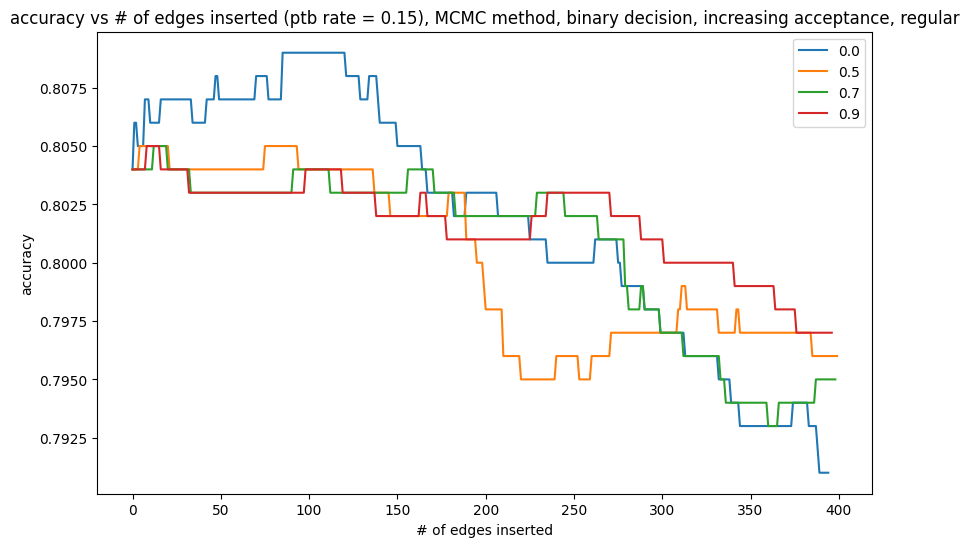

In [39]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "regular")

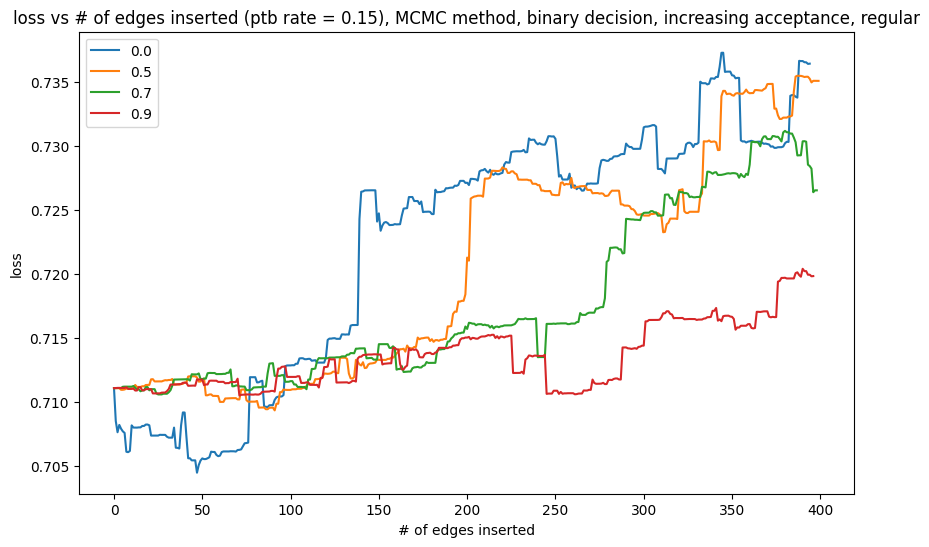

In [40]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "regular")

In [41]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [42]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: -5.1081180572509766e-05
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.3245811462402344e-06, master_dirty_delta: -4.112720489501953e-06
Attempt: 5, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -0.002178370952606201, master_dirty_delta: -0.0015785694122314453
Attempt: 6, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -9.000301361083984e-06, master_dirty_delta: -8.881092071533203e-06
Attempt: 7, Selected: 0
Attempt: 8, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -0.0002072453498840332
Attempt: 9, Selected: 0
Attempt: 10, Selected: 0
Attempt: 11, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 9.119510650634766e-06, master_dirty_delta: -3.3020973

Peturbing graph...:   0%|          | 0/203 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 17, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0005480647087097168, master_dirty_delta: 0.0006847381591796875
Attempt: 36, Selected: 20
Attempt: 37, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -0.00013899803161621094, master_dirty_delta: 0.0008625388145446777
Attempt: 58, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.004719555377960205, master_dirty_delta: 0.005410730838775635
Attempt: 59, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.004873931407928467, master_dirty_delta: 0.005524635314941406
Attempt: 82, Selected: 40
Attempt: 83, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.007145285606384277, master_dirty_delta: 0.007953405380249023
Attempt: 84, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.00

Peturbing graph...:   0%|          | 0/123 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 20, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0002783536911010742, master_dirty_delta: 0.0006292462348937988
Attempt: 21, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0004347562789916992, master_dirty_delta: 0.0009185671806335449
Attempt: 38, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: 0.0020351409912109375, master_dirty_delta: 0.0030648112297058105
Attempt: 57, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.004658043384552002, master_dirty_delta: 0.005504310131072998
Attempt: 58, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.004812419414520264, master_dirty_delta: 0.005658745765686035
Attempt: 80, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.007437705993652344, master_dirty_delta: 0.008440136909

Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

In [43]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GSAGE, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"cora"}_{"constant"}_{"decaying"}_{"attacked"}_results.pkl')

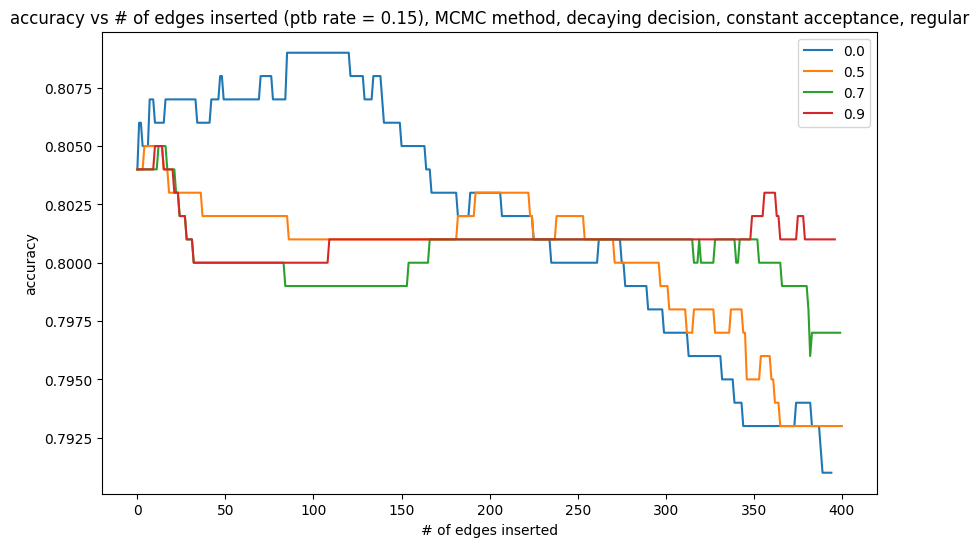

In [44]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "regular")

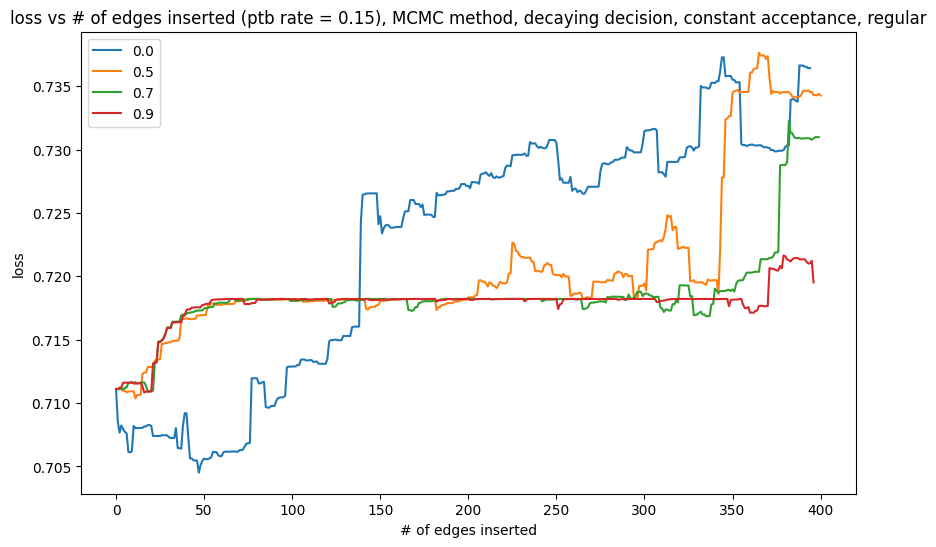

In [45]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "regular")

In [46]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [47]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: -5.1081180572509766e-05
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.3245811462402344e-06, master_dirty_delta: -4.112720489501953e-06
Attempt: 5, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -0.002178370952606201, master_dirty_delta: -0.0015785694122314453
Attempt: 6, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: -9.000301361083984e-06, master_dirty_delta: -8.881092071533203e-06
Attempt: 7, Selected: 0
Attempt: 8, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -0.0002072453498840332
Attempt: 9, Selected: 0
Attempt: 10, Selected: 0
Attempt: 11, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 9.119510650634766e-06, master_dirty_delta: -3.3020973

Peturbing graph...:   0%|          | 0/203 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 17, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: 0.0001671910285949707, master_dirty_delta: 0.0003021359443664551
Attempt: 36, Selected: 20
Attempt: 37, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: -0.0002599358558654785, master_dirty_delta: 0.0004897117614746094
Attempt: 64, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.0007183551788330078, master_dirty_delta: 0.0014452934265136719
Attempt: 102, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0008741021156311035, master_dirty_delta: 0.0017226338386535645
Attempt: 103, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0008796453475952148, master_dirty_delta: 0.001728832721710205
Attempt: 104, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0008825063705444336, 

Peturbing graph...:   0%|          | 0/123 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.007111045122146606, master_clean_delta: 8.404254913330078e-06, master_dirty_delta: 8.404254913330078e-06
Attempt: 23, Selected: 10
max_change: 0.007111045122146606, master_clean_delta: -3.147125244140625e-05, master_dirty_delta: 0.0004368424415588379
Attempt: 47, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: 6.848573684692383e-05, master_dirty_delta: 0.0008258223533630371
Attempt: 48, Selected: 20
max_change: 0.007111045122146606, master_clean_delta: 0.00012320280075073242, master_dirty_delta: 0.0008805990219116211
Attempt: 70, Selected: 30
max_change: 0.007111045122146606, master_clean_delta: 0.0005391836166381836, master_dirty_delta: 0.0012927651405334473
Attempt: 105, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0005418658256530762, master_dirty_delta: 0.0013303160667419434
Attempt: 106, Selected: 40
max_change: 0.007111045122146606, master_clean_delta: 0.0002192854881286621, master_dirty_delta: 0.001

Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

In [48]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GSAGE, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"cora"}_{"increasing"}_{"decaying"}_{"attacked"}_results.pkl')

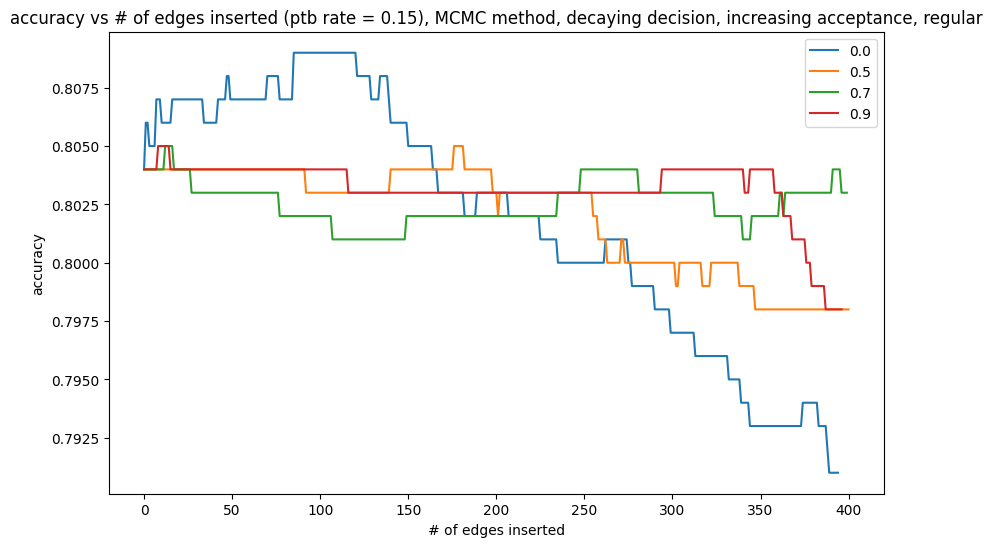

In [49]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")

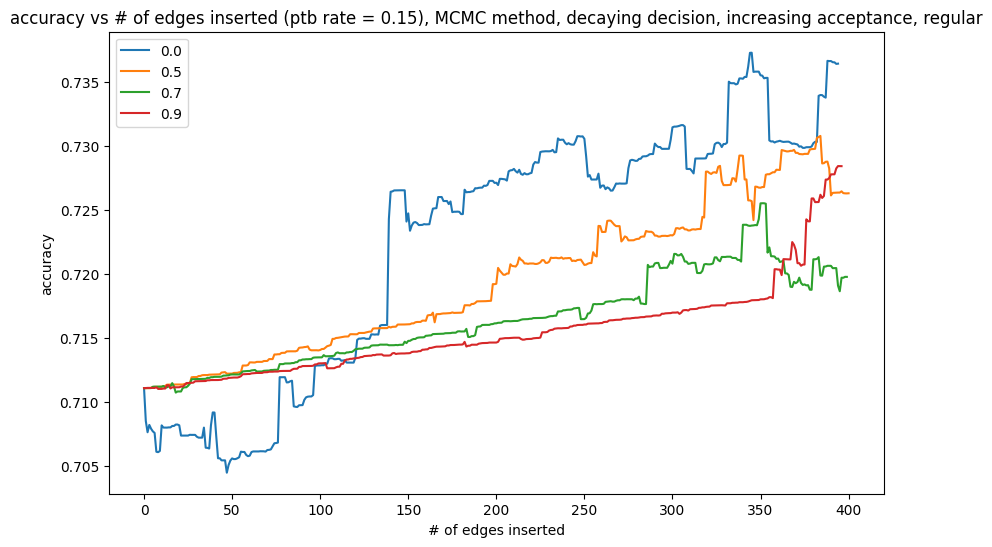

In [50]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")